# New Example: Calcium-IP3 Oscillations

- Two variable set-up as in the S->P oscillator
- Single crossing of nullclines
- Steady state to oscillation transition as calcium supply is increased
- Basis of a spatio-temporal model

In [1]:
from scipy.integrate import solve_ivp
from matplotlib.pyplot import subplots
from numpy import linspace, around, var, ndarray
from scipy.signal import find_peaks

In [2]:
def plot_bifdiagram(results_min_f, results_max_f, 
                    par_set):
    
    N = len(results_min_f)

    fig, ax = subplots(figsize=(6, 4))

    for xe, ye in zip(par_set, results_max_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='k', s=6, marker='D')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='r', marker='D')

    for xe, ye in zip(par_set, results_min_f[0]):

        if not isinstance(ye, ndarray):
            ax.scatter(xe, ye, c='gray', s=6, marker='d')
        else:
            ax.scatter([xe] * len(ye), ye, s=3, c='b', marker='d')


    ax.set_xticks(linspace(par_set[0], par_set[-1], 5));
    ax.set_xticklabels(around(linspace(par_set[0], par_set[-1], 5), 2), fontsize=16);
    ax.set_xlabel('Parameter', fontsize=16)

    ax.set_ylabel('EX', fontsize=14)

    y_min, y_max = ax.get_ylim()

    ax.set_yticks(linspace(y_min, y_max, 3));
    ax.set_yticklabels(around(linspace(y_min, y_max, 3),2), fontsize=14);

    fig.tight_layout()
    
    return fig, ax

# Model of Feedforward inhibition combined with feedback inhibition


## Time Series

In [3]:
def model(t, variables, a, m2, m3, ka, k, k1):
    """Calcium induced calcium release"""
    X, Y = variables
        
    dXdt = a - m2*X/(1+X) + (m3*Y/(k1+Y))*X**2/(ka+X**2) + Y - k*X
    dYdt =     m2*X/(1+X) - (m3*Y/(k1+Y))*X**2/(ka+X**2) - Y
    
    return [dXdt, dYdt]
    
X_0 = 2.5
Y_0 = 1.0

y0 = [X_0, Y_0]

a         = 0.32
m2, m3    = 20, 23
ka, k, k1 = 0.8, 0.8, 0.8

t_span = (0, 100)


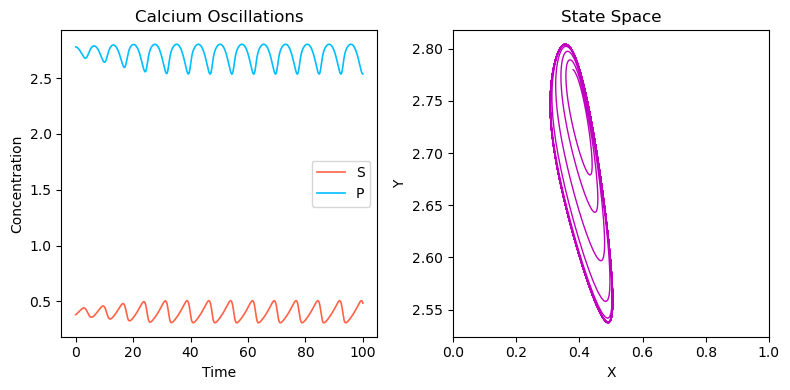

In [4]:
def model(t, variables, a, m2, m3, ka, k, k1):
    """Coupled system with feedback inhibition"""
    X, Y = variables
        
    dXdt = a - m2*X/(1+X) + (m3*Y/(k1+Y))*X**2/(ka+X**2) + Y - k*X
    dYdt =     m2*X/(1+X) - (m3*Y/(k1+Y))*X**2/(ka+X**2) - Y
    
    return [dXdt, dYdt]

X_0 = 2.5
Y_0 = 1.0

y0 = [X_0, Y_0]
y0 = [0.38, 2.78]

a         = 0.32
m2, m3    = 20, 23
ka, k, k1 = 0.8, 0.8, 0.8

t_span = (0, 100)

solution = solve_ivp(model, t_span, y0, args=(a, m2, m3, ka, k, k1), method='BDF', max_step=0.1)

t = solution.t

X = solution.y[0]
Y = solution.y[1]

fig, ax = subplots(ncols=2, figsize=(8, 4))

ax[0].plot(t, X, label='S', linewidth=1.2, color='tomato')
ax[0].plot(t, Y, label='P', linewidth=1.2, color='deepskyblue')

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Concentration')
ax[0].legend()
ax[0].set_title('Calcium Oscillations')

ax[1].plot(X, Y, linewidth=1, color='m');
# ax[1].plot(c2[:300], c3[:300], linewidth=1, color='k');
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('State Space')
ax[1].set_xlim(0, 1)
# ax[1].set_ylim(4, 14)


fig.tight_layout()

In [5]:
around((X[-1], Y[-1]), 2)


array([0.48, 2.54])

## State Space Nullclines

NULLCLINE ANALYSIS FOR OSCILLATORY SYSTEM
b1=0.18, b2=0.05
a1=0.66, a2=0.02
k_max=25.0, K_m=0.7
k_i=0.06
n=1, m=3, q=2.8

Computing S-nullcline...
Computing P-nullcline...
Finding fixed points...
Found 0 fixed point(s):
Adding limit cycle from simulation...


/var/folders/cs/lkcj7j890kv6kfxbkl56w9h80000gn/T/ipykernel_3569/3488120556.py:23: RuntimeWarning:

invalid value encountered in scalar power

/var/folders/cs/lkcj7j890kv6kfxbkl56w9h80000gn/T/ipykernel_3569/3488120556.py:134: RuntimeWarning:

The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.



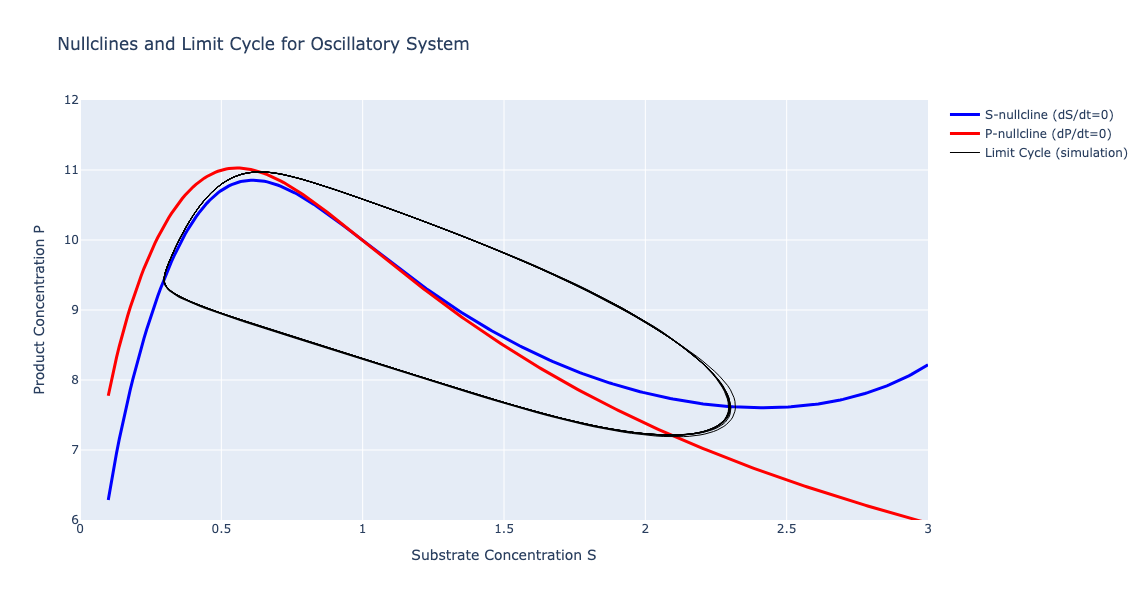


MATHEMATICAL ANALYSIS
Nullcline equations:
S-nullcline: a₁ - b₁·S = k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)
P-nullcline: a₂ - b₂·P = -k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)

Rearranged:
S-nullcline: P = √[(k_max·S/((a₁ - b₁·S)(K_m³ + S³)) - 1)/k_i]
P-nullcline: P = [a₂ + k_max·S/((K_m³ + S³)(1 + k_i·P²))]/b₂


The purple limit cycle shows sustained oscillations around the fixed point!


In [7]:
# import numpy as np
# import plotly.graph_objects as go
# from scipy.optimize import fsolve

# # Your oscillatory parameters
# # b1, b2 = 0.18, 0.05
# # a1, a2 = 0.62, 0.03
# # k_max, K_m = 4.5, 0.9
# # k_i = 0.06
# # n, m, q = 1, 3, 2

# print("NULLCLINE ANALYSIS FOR OSCILLATORY SYSTEM")
# print("="*50)
# print(f"b1={b1}, b2={b2}")
# print(f"a1={a1}, a2={a2}")
# print(f"k_max={k_max}, K_m={K_m}")
# print(f"k_i={k_i}")
# print(f"n={n}, m={m}, q={q}")
# print()

# def enzymatic_rate(S, P):
#     """Enzymatic rate with forward and feedback inhibition"""
#     return (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)

# def S_nullcline(S, P):
#     """S-nullcline: dS/dt = 0 => a1 - b1*S = v(S,P)"""
#     return a1 - b1*S - enzymatic_rate(S, P)

# def P_nullcline(S, P):
#     """P-nullcline: dP/dt = 0 => a2 - b2*P = -v(S,P)"""
#     return a2 - b2*P + enzymatic_rate(S, P)

# # Compute S-nullcline: For each S, find P such that dS/dt = 0
# print("Computing S-nullcline...")
# S_values = np.linspace(0.1, 3, 300)
# P_S_null = []

# for S in S_values:
#     def equation(P):
#         return S_nullcline(S, P)
    
#     try:
#         # Try multiple initial guesses
#         solutions = []
#         for P_guess in [5.0, 6.0, 7.0, 8.0]:
#             result = fsolve(equation, P_guess)
#             if (result[0] > 0 and result[0] < 15 and 
#                 abs(equation(result[0])) < 1e-6):
#                 solutions.append(result[0])
        
#         # Remove duplicates and take the first valid solution
#         if solutions:
#             unique_solutions = []
#             for sol in solutions:
#                 if not any(abs(sol - existing) < 0.1 for existing in unique_solutions):
#                     unique_solutions.append(sol)
#             P_S_null.append(unique_solutions[0])  # Take first branch for plotting
#         else:
#             P_S_null.append(np.nan)
#     except:
#         P_S_null.append(np.nan)

# # Compute P-nullcline: For each S, find P such that dP/dt = 0
# print("Computing P-nullcline...")
# P_P_null = []

# for S in S_values:
#     def equation(P):
#         return P_nullcline(S, P)
    
#     try:
#         # Try multiple initial guesses
#         solutions = []
#         for P_guess in [0.1, 1.0, 3.0, 5.0]:
#             result = fsolve(equation, P_guess)
#             if (result[0] > 0 and result[0] < 15 and 
#                 abs(equation(result[0])) < 1e-6):
#                 solutions.append(result[0])
        
#         # Remove duplicates and take the first valid solution
#         if solutions:
#             unique_solutions = []
#             for sol in solutions:
#                 if not any(abs(sol - existing) < 0.1 for existing in unique_solutions):
#                     unique_solutions.append(sol)
#             P_P_null.append(unique_solutions[0])  # Take first branch for plotting
#         else:
#             P_P_null.append(np.nan)
#     except:
#         P_P_null.append(np.nan)

# # Create the phase portrait
# fig = go.Figure()

# # Plot S-nullcline
# valid_S_S = []
# valid_P_S = []
# for S, P in zip(S_values, P_S_null):
#     if not np.isnan(P):
#         valid_S_S.append(S)
#         valid_P_S.append(P)

# fig.add_trace(go.Scatter(x=valid_S_S, y=valid_P_S, mode='lines',
#                         name='S-nullcline (dS/dt=0)',
#                         line=dict(color='blue', width=3)))

# # Plot P-nullcline
# valid_S_P = []
# valid_P_P = []
# for S, P in zip(S_values, P_P_null):
#     if not np.isnan(P):
#         valid_S_P.append(S)
#         valid_P_P.append(P)

# fig.add_trace(go.Scatter(x=valid_S_P, y=valid_P_P, mode='lines',
#                         name='P-nullcline (dP/dt=0)',
#                         line=dict(color='red', width=3)))

# # Find fixed points (intersections)
# print("Finding fixed points...")
# fixed_points = []

# # Search in S-P space
# S_search = np.linspace(0.1, 3, 50)
# P_search = np.linspace(0.1, 5, 50)

# for S_guess in S_search:
#     for P_guess in P_search:
#         def equations(vars):
#             S, P = vars
#             return [S_nullcline(S, P), P_nullcline(S, P)]
        
#         try:
#             result = fsolve(equations, [S_guess, P_guess])
#             S_sol, P_sol = result
            
#             # Check if valid solution
#             residuals = equations([S_sol, P_sol])
#             if (np.linalg.norm(residuals) < 1e-6 and 
#                 S_sol > 0 and P_sol > 0 and 
#                 S_sol <= 5 and P_sol <= 5):
                
#                 # Check if new
#                 is_new = True
#                 for existing in fixed_points:
#                     if (abs(S_sol - existing[0]) < 0.1 and 
#                         abs(P_sol - existing[1]) < 0.1):
#                         is_new = False
#                         break
                
#                 if is_new:
#                     fixed_points.append((S_sol, P_sol))
#         except:
#             continue

# print(f"Found {len(fixed_points)} fixed point(s):")
# for i, (S, P) in enumerate(fixed_points):
#     print(f"  FP{i+1}: S = {S:.3f}, P = {P:.3f}")

# # Plot fixed points
# for i, (S, P) in enumerate(fixed_points):
#     fig.add_trace(go.Scatter(x=[S], y=[P], mode='markers',
#                             marker=dict(size=15, color='green', symbol='circle',
#                                       line=dict(width=1, color='black')),
#                             name=f'Fixed Point {i+1}'))

# # Add a limit cycle from simulation to show oscillations
# print("Adding limit cycle from simulation...")
# from scipy.integrate import solve_ivp

# def system_dynamics(t, variables):
#     S, P = variables
#     rate = enzymatic_rate(S, P)
#     dSdt = a1 - b1*S - rate
#     dPdt = a2 - b2*P + rate
#     return [dSdt, dPdt]

# # Simulate to get limit cycle
# sol = solve_ivp(system_dynamics, (0, 2000), [1.0, 1.0],
#                 t_eval=np.linspace(0, 2000, 5000), method='RK45')

# # Use only the last part to avoid transients
# S_cycle = sol.y[0][-2000:]
# P_cycle = sol.y[1][-2000:]

# fig.add_trace(go.Scatter(x=S_cycle, y=P_cycle, mode='lines',
#                         name='Limit Cycle (simulation)',
#                         line=dict(color='black', width=1)))

# # Update layout
# fig.update_layout(
#     title="Nullclines and Limit Cycle for Oscillatory System",
#     xaxis_title="Substrate Concentration S",
#     yaxis_title="Product Concentration P", 
#     width=700,
#     height=600,
#     showlegend=True
# )

# fig.update_xaxes(range=[0, 3])
# fig.update_yaxes(range=[6, 12])

# fig.show()

# # Mathematical analysis
# print("\n" + "="*50)
# print("MATHEMATICAL ANALYSIS")
# print("="*50)

# print("Nullcline equations:")
# print("S-nullcline: a₁ - b₁·S = k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)")
# print("P-nullcline: a₂ - b₂·P = -k_max·S/(K_m³ + S³) · 1/(1 + k_i·P²)")
# print()
# print("Rearranged:")
# print("S-nullcline: P = √[(k_max·S/((a₁ - b₁·S)(K_m³ + S³)) - 1)/k_i]")
# print("P-nullcline: P = [a₂ + k_max·S/((K_m³ + S³)(1 + k_i·P²))]/b₂")
# print()

# if len(fixed_points) == 1:
#     S_fp, P_fp = fixed_points[0]
#     print(f"Single fixed point at: S = {S_fp:.3f}, P = {P_fp:.3f}")
#     print("This is typical for oscillatory systems - an unstable fixed point")
#     print("surrounded by a stable limit cycle!")
    
#     # Check stability roughly by simulating nearby
#     sol_test = solve_ivp(system_dynamics, (0, 50), [S_fp + 0.1, P_fp + 0.1],
#                         t_eval=[0, 50], method='RK45')
#     final_S, final_P = sol_test.y[0, -1], sol_test.y[1, -1]
#     distance = np.sqrt((final_S - S_fp)**2 + (final_P - P_fp)**2)
    
#     if distance > 0.5:
#         print("Fixed point appears UNSTABLE (spiral source)")
#     else:
#         print("Fixed point appears STABLE")

# print("\nThe purple limit cycle shows sustained oscillations around the fixed point!")

## Bifurcation Diagram

In [32]:
# Bifurcation parameter set
par_min, par_max, steps = 0.3, 0.35, 30
# par_min, par_max, steps = 0.75, 0.63, 30

par_set = linspace(par_min, par_max, steps)

# Time array
t_span = (0, 500)

results_min_f      = dict()
results_min_inds_f = dict()
results_max_f      = dict()
results_max_inds_f = dict()

# Simulation "forward"
for par in par_set:

    solution = solve_ivp(model, t_span, y0, args=(par, m2, m3, ka, k, k1), method='BDF', max_step=0.1)

    X = solution.y[0]
    Y = solution.y[1]

    rows = X.size//2

    series = X[rows//2:]

    num = 0
                
    if var(series) < 0.001:

        if num not in results_min_f:
            
            results_min_f[num]      = [series[-1]]
            results_min_inds_f[num] = [0]    
           
        else:
            results_min_f[num].append(series[-1])
            results_min_inds_f[num].append(0)    

        if num not in results_max_f:
            
            results_max_f[num]      = [series[-1]]
            results_max_inds_f[num] = [0]    
           
        else:
            results_max_f[num].append(series[-1])
            results_max_inds_f[num].append(0)    

    else:
        
        y_f_max_inds = find_peaks(series, distance=100)
        y_f_maxs     = series[y_f_max_inds[0]]

        y_f_min_inds = find_peaks(-series, distance=100)
        y_f_mins     = series[y_f_min_inds[0]]

        if num not in results_min_f:

            results_min_f[num]      = [y_f_mins]
            results_min_inds_f[num] = [y_f_min_inds]
            
            results_max_f[num]      = [y_f_maxs]
            results_max_inds_f[num] = [y_f_max_inds]

        else:

            results_min_f[num].append(y_f_mins)
            results_min_inds_f[num].append(y_f_min_inds)
            
            results_max_f[num].append(y_f_maxs)
            results_max_inds_f[num].append(y_f_max_inds)


    if par != par_set[-1]:
        
        y0 = solution.y[:, -1]

print('')
print('Scan complete!', list(around(solution.y[:, -1],3)))
print('')


Scan complete! [np.float64(0.429), np.float64(1.933)]



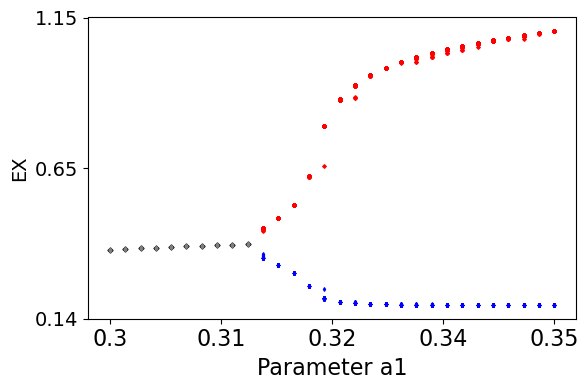

In [33]:
fig, ax = plot_bifdiagram(results_min_f, results_max_f, par_set)

title_chars = 'Parameter a1'
    
ax.set_xlabel(title_chars, fontsize=16);

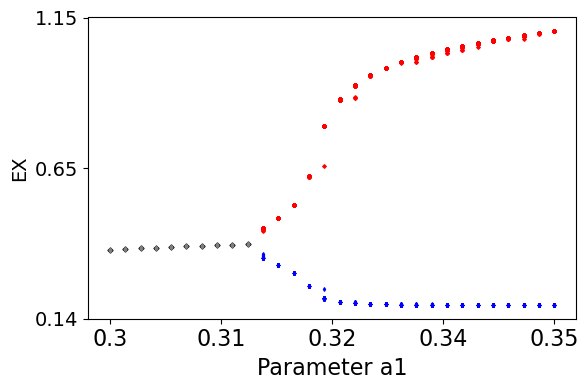

In [34]:
fig, ax = plot_bifdiagram(results_min_f, results_max_f, par_set)
    
ax.set_xlabel(title_chars, fontsize=16);

# Oscillation animation 

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.integrate import solve_ivp
import plotly.express as px

# Your model definition
def model(t, variables, a1, b1, a2, b2, k_max, K_m, k_i, n, m, q):
    """Coupled system with feedback inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]

# Parameters
S_0 = 1.97
P_0 = 6.97
b1, b2 = 0.18, 0.05
a1, a2 = 0.7, 0.02
k_max, K_m, k_i = 25.0, 0.7, 0.06
n, m, q = 1, 3, 2.8
t_span = (0, 700)

# Solve the ODE
t_eval = np.linspace(t_span[0], t_span[1], 1000)
sol = solve_ivp(model, t_span, [S_0, P_0], args=(a1, b1, a2, b2, k_max, K_m, k_i, n, m, q), 
                t_eval=t_eval, method='RK45')

S_sol = sol.y[0]
P_sol = sol.y[1]
t_sol = sol.t

# Normalize for bubble sizes (adjust scaling factors as needed)
S_bubble_size = 10 + 40 * (S_sol - np.min(S_sol)) / (np.max(S_sol) - np.min(S_sol))
P_bubble_size = 10 + 40 * (P_sol - np.min(P_sol)) / (np.max(P_sol) - np.min(P_sol))

# Create the animation
fig = go.Figure()

# Add initial frames
frames = []
for i in range(len(t_sol)):
    frame = go.Frame(
        data=[
            # S bubble
            go.Scatter3d(
                x=[0], y=[0], z=[0],
                mode='markers',
                marker=dict(
                    size=S_bubble_size[i],
                    sizemode='diameter',
                    color='blue',
                    opacity=0.7,
                    line=dict(color='darkblue', width=2)
                ),
                name=f'S: {S_sol[i]:.2f}',
                text=f'S: {S_sol[i]:.2f}',
                hoverinfo='text'
            ),
            # P bubble  
            go.Scatter3d(
                x=[2], y=[0], z=[0],
                mode='markers',
                marker=dict(
                    size=P_bubble_size[i],
                    sizemode='diameter',
                    color='red',
                    opacity=0.7,
                    line=dict(color='darkred', width=2)
                ),
                name=f'P: {P_sol[i]:.2f}',
                text=f'P: {P_sol[i]:.2f}',
                hoverinfo='text'
            ),
            # Arrow from S to P
            go.Cone(
                x=[0.5], y=[0], z=[0],
                u=[1], v=[0], w=[0],
                sizemode='absolute',
                sizeref=0.5,
                anchor='tail',
                colorscale=[[0, 'green'], [1, 'green']],
                showscale=False,
                name='Reaction'
            )
        ],
        name=f'frame_{i}'
    )
    frames.append(frame)

# Add initial data for the first frame
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=S_bubble_size[0], sizemode='diameter', color='blue', opacity=0.7),
    name='S'
))

fig.add_trace(go.Scatter3d(
    x=[2], y=[0], z=[0],
    mode='markers', 
    marker=dict(size=P_bubble_size[0], sizemode='diameter', color='red', opacity=0.7),
    name='P'
))

fig.add_trace(go.Cone(
    x=[0.5], y=[0], z=[0],
    u=[1], v=[0], w=[0],
    sizemode='absolute',
    sizeref=0.5,
    anchor='tail',
    colorscale=[[0, 'green'], [1, 'green']],
    showscale=False,
    name='Reaction'
))

# Configure the animation
fig.frames = frames

animation_settings = dict(
    frame=dict(duration=50, redraw=True),
    fromcurrent=True,
    mode='immediate'
)

sliders = [dict(
    steps=[dict(method='animate',
                args=[[f'frame_{k}'], 
                      dict(mode='immediate', frame=dict(duration=50, redraw=True))],
                label=f'{t_sol[k]:.1f}') for k in range(0, len(t_sol), 50)],
    transition=dict(duration=0),
    x=0.1, y=0,
    currentvalue=dict(font=dict(size=12), prefix='Time: ', visible=True, xanchor='center'),
    len=0.9
)]

play_button = dict(
    args=[None, dict(frame=dict(duration=50, redraw=True), 
                     transition=dict(duration=0), 
                     fromcurrent=True,
                     mode='immediate')],
    label='Play',
    method='animate'
)

pause_button = dict(
    args=[[None], dict(frame=dict(duration=0, redraw=False), 
                       mode='immediate',
                       transition=dict(duration=0))],
    label='Pause',
    method='animate'
)

updatemenus = [dict(
    type='buttons',
    showactive=False,
    buttons=[play_button, pause_button],
    x=0.1, y=-0.1,
    xanchor='right',
    yanchor='top'
)]

# Update layout
fig.update_layout(
    title='Oscillating Reaction System: S ⇌ P',
    scene=dict(
        xaxis=dict(title='', range=[-1, 3], showticklabels=False, showgrid=False),
        yaxis=dict(title='', range=[-1, 1], showticklabels=False, showgrid=False),
        zaxis=dict(title='', range=[-1, 1], showticklabels=False, showgrid=False),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)),
        aspectmode='cube'
    ),
    sliders=sliders,
    updatemenus=updatemenus,
    width=800,
    height=600
)

# Add annotations for labels
fig.add_annotation(
    x=0, y=-0.15, xref="paper", yref="paper",
    text="S (Substrate)", showarrow=False, font=dict(color="blue", size=12)
)

fig.add_annotation(
    x=1, y=-0.15, xref="paper", yref="paper", 
    text="P (Product)", showarrow=False, font=dict(color="red", size=12)
)

fig.show()

# Optional: Create a 2D time series plot to show the oscillations
fig_time = make_subplots(rows=2, cols=1, subplot_titles=('Concentrations over Time', 'Bubble Sizes over Time'))

fig_time.add_trace(
    go.Scatter(x=t_sol, y=S_sol, name='S', line=dict(color='blue')),
    row=1, col=1
)

fig_time.add_trace(
    go.Scatter(x=t_sol, y=P_sol, name='P', line=dict(color='red')),
    row=1, col=1
)

fig_time.add_trace(
    go.Scatter(x=t_sol, y=S_bubble_size, name='S Bubble Size', line=dict(color='blue', dash='dot')),
    row=2, col=1
)

fig_time.add_trace(
    go.Scatter(x=t_sol, y=P_bubble_size, name='P Bubble Size', line=dict(color='red', dash='dot')),
    row=2, col=1
)

fig_time.update_layout(height=600, title_text="Oscillation Analysis")
fig_time.update_xaxes(title_text="Time", row=2, col=1)
fig_time.update_yaxes(title_text="Concentration", row=1, col=1)
fig_time.update_yaxes(title_text="Bubble Size", row=2, col=1)

fig_time.show()

In [6]:
# import numpy as np
# import plotly.graph_objects as go
# from scipy.integrate import solve_ivp

# # Your model definition
# def model(t, variables, a1, b1, a2, b2, k_max, K_m, k_i, n, m, q):
#     """Coupled system with feedback inhibition"""
#     S, P = variables
    
#     enzymatic_rate = (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)
    
#     dSdt = a1 - b1 * S - enzymatic_rate
#     dPdt = a2 - b2 * P + enzymatic_rate
    
#     return [dSdt, dPdt]

# # Parameters
# S_0 = 1.97
# P_0 = 6.97
# b1, b2 = 0.18, 0.05
# a1, a2 = 0.7, 0.02
# k_max, K_m, k_i = 25.0, 0.7, 0.06
# n, m, q = 1, 3, 2.8
# t_span = (0, 500)

# # Solve the ODE
# t_eval = np.linspace(t_span[0], t_span[1], 300)  # Reduced points for smoother animation
# sol = solve_ivp(model, t_span, [S_0, P_0], args=(a1, b1, a2, b2, k_max, K_m, k_i, n, m, q), 
#                 t_eval=t_eval, method='RK45')

# S_sol = sol.y[0]
# P_sol = sol.y[1]
# t_sol = sol.t

# # Normalize for circle sizes - using reasonable range
# S_radius = 5 + 60 * (S_sol - np.min(S_sol)) / (np.max(S_sol) - np.min(S_sol))
# P_radius = 5 + 60 * (P_sol - np.min(P_sol)) / (np.max(P_sol) - np.min(P_sol))

# # Create the 2D animation
# fig = go.Figure()

# # Fixed positions
# S_pos = [-7, 0]  # S circle position
# P_pos = [7, 0]   # P circle position

# # Create frames
# frames = []
# for i in range(len(t_sol)):
#     frame = go.Frame(
#         data=[
#             # S circle
#             go.Scatter(
#                 x=[S_pos[0]], y=[S_pos[1]],
#                 mode='markers',
#                 marker=dict(
#                     size=S_radius[i],
#                     sizemode='diameter',
#                     color='blue',
#                     opacity=0.7,
#                     line=dict(color='darkblue', width=3)
#                 ),
#                 # name=f'S: {S_sol[i]:.2f}',
#                 # text=f'S: {S_sol[i]:.2f}',
#                 hoverinfo='text'
#             ),
#             # P circle
#             go.Scatter(
#                 x=[P_pos[0]], y=[P_pos[1]],
#                 mode='markers',
#                 marker=dict(
#                     size=P_radius[i],
#                     sizemode='diameter',
#                     color='red',
#                     opacity=0.7,
#                     line=dict(color='darkred', width=3)
#                 ),
#                 # name=f'P: {P_sol[i]:.2f}',
#                 # text=f'P: {P_sol[i]:.2f}',
#                 hoverinfo='text'
#             ),
#             # Arrow from S to P
#             go.Scatter(
#                 x=[S_pos[0] + S_radius[i]/100, P_pos[0] - P_radius[i]/100],  # Start from S edge, end at P edge
#                 y=[0, 0],
#                 mode='lines+markers',
#                 line=dict(color='green', width=6),
#                 marker=dict(
#                     size=12,
#                     color='green',
#                     symbol='triangle-right'
#                 ),
#                 name='Reaction',
#                 showlegend=False
#             ),
#             # Concentration labels
#             go.Scatter(
#                 x=[S_pos[0], P_pos[0]],
#                 y=[S_pos[1] - max(S_radius[i], P_radius[i])/50 - 2, 
#                    P_pos[1] - max(S_radius[i], P_radius[i])/50 - 2],
#                 # mode='text',
#                 # text=[f'S: {S_sol[i]:.2f}', f'P: {P_sol[i]:.2f}'],
#                 # textfont=dict(size=14, color=['blue', 'red']),
#                 showlegend=False,
#                 hoverinfo='skip'
#             )
#         ],
#         name=f'frame_{i}'
#     )
#     frames.append(frame)

# # Add initial data
# fig.add_trace(go.Scatter(
#     x=[S_pos[0]], y=[S_pos[1]],
#     mode='markers',
#     marker=dict(
#         size=S_radius[0],
#         sizemode='diameter',
#         color='blue',
#         opacity=0.7,
#         line=dict(color='darkblue', width=3)
#     ),
#     name='S (Substrate)'
# ))

# fig.add_trace(go.Scatter(
#     x=[P_pos[0]], y=[P_pos[1]],
#     mode='markers',
#     marker=dict(
#         size=P_radius[0],
#         sizemode='diameter',
#         color='red',
#         opacity=0.7,
#         line=dict(color='darkred', width=3)
#     ),
#     name='P (Product)'
# ))

# fig.add_trace(go.Scatter(
#     x=[S_pos[0] + S_radius[0]/100, P_pos[0] - P_radius[0]/100],
#     y=[0, 0],
#     mode='lines+markers',
#     line=dict(color='green', width=6),
#     marker=dict(size=12, color='green', symbol='triangle-right'),
#     name='Reaction Flow',
#     showlegend=False
# ))

# fig.add_trace(go.Scatter(
#     x=[S_pos[0], P_pos[0]],
#     y=[S_pos[1] - max(S_radius[0], P_radius[0])/50 - 2, 
#        P_pos[1] - max(S_radius[0], P_radius[0])/50 - 2],
#     mode='text',
#     text=[f'S: {S_sol[0]:.2f}', f'P: {S_sol[0]:.2f}'],
#     textfont=dict(size=14, color=['blue', 'red']),
#     showlegend=False,
#     hoverinfo='skip'
# ))

# # Configure animation
# fig.frames = frames

# # Animation controls
# sliders = [dict(
#     steps=[dict(
#         method='animate',
#         args=[[f'frame_{k}'], dict(mode='immediate', frame=dict(duration=50, redraw=True))],
#         label=f'{t_sol[k]:.1f}'
#     ) for k in range(0, len(t_sol), 20)],
#     active=0,
#     currentvalue=dict(prefix='Time: ', visible=True),
#     len=0.9,
#     x=0.1,
#     y=0
# )]

# updatemenus = [dict(
#     type='buttons',
#     showactive=False,
#     buttons=[
#         dict(label='Play', method='animate',
#              args=[None, dict(frame=dict(duration=50, redraw=True), 
#                              fromcurrent=True, mode='immediate')]),
#         dict(label='Pause', method='animate',
#              args=[[None], dict(frame=dict(duration=0, redraw=False), 
#                                mode='immediate')])
#     ],
#     x=0.1, y=-0.1,
#     xanchor='right',
#     yanchor='top'
# )]

# # Update layout with fixed axes
# fig.update_layout(
#     title='Oscillating Reaction System: S -> P',
#     xaxis=dict(
#         range=[-15, 15],  # Fixed x-axis range
#         showticklabels=False,
#         showgrid=True,
#         gridcolor='lightgray',
#         zeroline=False
#     ),
#     yaxis=dict(
#         range=[-10, 10],  # Fixed y-axis range
#         showticklabels=False,
#         showgrid=True,
#         gridcolor='lightgray',
#         zeroline=False,
#         scaleanchor="x",
#         scaleratio=1
#     ),
#     plot_bgcolor='white',
#     width=800,
#     height=500,
#     showlegend=True,
#     sliders=sliders,
#     updatemenus=updatemenus
# )

# # Add static labels
# fig.add_annotation(
#     x=S_pos[0], y=-8,
#     text="Substrate (S)",
#     showarrow=False,
#     font=dict(color='blue', size=14)
# )

# fig.add_annotation(
#     x=P_pos[0], y=-8,
#     text="Product (P)", 
#     showarrow=False,
#     font=dict(color='red', size=14)
# )

# fig.add_annotation(
#     x=0, y=7,
#     text="Enzymatic Reaction with Forward and Feedback Inhibition",
#     showarrow=False,
#     font=dict(size=16)
# )

# fig.show()

# # Optional: Create a time series plot to show the oscillations
# fig_time = go.Figure()
# fig_time.add_trace(go.Scatter(x=t_sol, y=S_sol, name='S Concentration', line=dict(color='blue', width=2)))
# fig_time.add_trace(go.Scatter(x=t_sol, y=P_sol, name='P Concentration', line=dict(color='red', width=2)))
# fig_time.update_layout(
#     title='Concentration Oscillations Over Time',
#     xaxis_title='Time',
#     yaxis_title='Concentration',
#     width=800,
#     height=400
# )
# fig_time.show()

/var/folders/cs/lkcj7j890kv6kfxbkl56w9h80000gn/T/ipykernel_3569/2234043172.py:10: RuntimeWarning:

invalid value encountered in scalar power



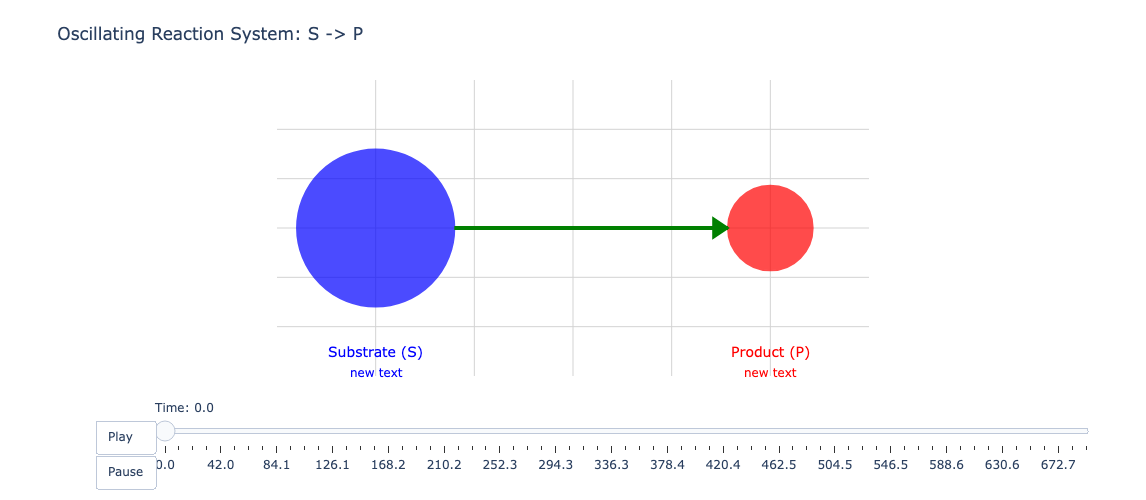

In [61]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import solve_ivp

# Your model definition
def model(t, variables, a1, b1, a2, b2, k_max, K_m, k_i, n, m, q):
    """Coupled system with feedback inhibition"""
    S, P = variables
    
    enzymatic_rate = (k_max * S**n) / (K_m**m + S**m) / (1 + k_i * P**q)
    
    dSdt = a1 - b1 * S - enzymatic_rate
    dPdt = a2 - b2 * P + enzymatic_rate
    
    return [dSdt, dPdt]

# Parameters
S_0 = 1.97
P_0 = 6.97
b1, b2 = 0.18, 0.05
a1, a2 = 0.7, 0.02
k_max, K_m, k_i = 25.0, 0.7, 0.06
n, m, q = 1, 3, 2.8
t_span = (0, 700)

# Solve the ODE
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Even fewer points for stability
sol = solve_ivp(model, t_span, [S_0, P_0], args=(a1, b1, a2, b2, k_max, K_m, k_i, n, m, q), 
                t_eval=t_eval, method='RK45')

S_sol = sol.y[0]
P_sol = sol.y[1]
t_sol = sol.t

# Normalize for circle radii - using pixel units for shapes
min_radius, max_radius = 15, 40
S_radius = min_radius + (max_radius - min_radius) * (S_sol - np.min(S_sol)) / (np.max(S_sol) - np.min(S_sol))
P_radius = min_radius + (max_radius - min_radius) * (P_sol - np.min(P_sol)) / (np.max(P_sol) - np.min(P_sol))

# Fixed positions
S_pos = [-4, 0]
P_pos = [4, 0]

# Create the figure with shapes (much more stable than scatter plots)
fig = go.Figure()

# Create frames using shapes instead of scatter plots
frames = []
for i in range(len(t_sol)):
    frame_data = [
        # S circle as shape
        dict(
            type="circle",
            xref="x", yref="y",
            x0=S_pos[0] - S_radius[i]/20,  # Divide by scaling factor
            y0=S_pos[1] - S_radius[i]/20,
            x1=S_pos[0] + S_radius[i]/20,
            y1=S_pos[1] + S_radius[i]/20,
            line_color="blue",
            fillcolor="blue",
            line_width=2,
            opacity=0.7
        ),
        # P circle as shape
        dict(
            type="circle",
            xref="x", yref="y",
            x0=P_pos[0] - P_radius[i]/20,
            y0=P_pos[1] - P_radius[i]/20,
            x1=P_pos[0] + P_radius[i]/20,
            y1=P_pos[1] + P_radius[i]/20,
            line_color="red",
            fillcolor="red",
            line_width=2,
            opacity=0.7
        ),
        # Arrow line
        dict(
            type="line",
            xref="x", yref="y",
            x0=S_pos[0] + S_radius[i]/20,
            y0=S_pos[1],
            x1=P_pos[0] - P_radius[i]/20,
            y1=P_pos[1],
            line=dict(color="green", width=4)
        ),
        # Arrow head
        dict(
            type="path",
            xref="x", yref="y",
            path=f"M {P_pos[0] - P_radius[i]/20 - 0.3} {P_pos[1] - 0.2} L {P_pos[0] - P_radius[i]/20} {P_pos[1]} L {P_pos[0] - P_radius[i]/20 - 0.3} {P_pos[1] + 0.2} Z",
            line_color="green",
            fillcolor="green"
        )
    ]
     
    # Add text annotations
    # text_annotations = [
    #     dict(
    #         x=S_pos[0],
    #         y=S_pos[1] - max(S_radius[i], P_radius[i])/15 - 0.8,
    #         text=f"S: {S_sol[i]:.2f}",
    #         showarrow=False,
    #         font=dict(color="blue", size=12),
    #         xref="x",
    #         yref="y"
    #     ),
    #     dict(
    #         x=P_pos[0],
    #         y=P_pos[1] - max(S_radius[i], P_radius[i])/15 - 0.8,
    #         text=f"P: {P_sol[i]:.2f}",
    #         showarrow=False,
    #         font=dict(color="red", size=12),
    #         xref="x",
    #         yref="y"
    #     )
    # ]
    
    frame = go.Frame(
        data=[],  # No scatter data
        layout=dict(
            shapes=frame_data,
            # annotations=text_annotations
        ),
        name=f'frame_{i}'
    )
    frames.append(frame)

# Add initial shapes
fig.add_shape(
    type="circle",
    xref="x", yref="y",
    x0=S_pos[0] - S_radius[0]/20,
    y0=S_pos[1] - S_radius[0]/20,
    x1=S_pos[0] + S_radius[0]/20,
    y1=S_pos[1] + S_radius[0]/20,
    line_color="blue",
    fillcolor="blue",
    line_width=2,
    opacity=0.7
)

fig.add_shape(
    type="circle",
    xref="x", yref="y",
    x0=P_pos[0] - P_radius[0]/20,
    y0=P_pos[1] - P_radius[0]/20,
    x1=P_pos[0] + P_radius[0]/20,
    y1=P_pos[1] + P_radius[0]/20,
    line_color="red",
    fillcolor="red", 
    line_width=2,
    opacity=0.7
)

fig.add_shape(
    type="line",
    xref="x", yref="y",
    x0=S_pos[0] + S_radius[0]/20,
    y0=S_pos[1],
    x1=P_pos[0] - P_radius[0]/20,
    y1=P_pos[1],
    line=dict(color="green", width=4)
)

fig.add_shape(
    type="path",
    xref="x", yref="y",
    path=f"M {P_pos[0] - P_radius[0]/20 - 0.3} {P_pos[1] - 0.2} L {P_pos[0] - P_radius[0]/20} {P_pos[1]} L {P_pos[0] - P_radius[0]/20 - 0.3} {P_pos[1] + 0.2} Z",
    line_color="green",
    fillcolor="green"
)

# Add initial annotations
fig.add_annotation(
    x=S_pos[0],
    y=S_pos[1] - max(S_radius[0], P_radius[0])/15 - 0.8,
    # text=f"S: {S_sol[0]:.2f}",
    showarrow=False,
    font=dict(color="blue", size=12),
    xref="x",
    yref="y"
)

fig.add_annotation(
    x=P_pos[0],
    y=P_pos[1] - max(S_radius[0], P_radius[0])/15 - 0.8,
    # text=f"P: {P_sol[0]:.2f}",
    showarrow=False,
    font=dict(color="red", size=12),
    xref="x",
    yref="y"
)

# Configure animation
fig.frames = frames

# Animation controls
sliders = [dict(
    steps=[dict(
        method="animate",
        args=[[f'frame_{k}'], 
              dict(mode="immediate", frame=dict(duration=50, redraw=True), 
                   transition=dict(duration=0))],
        label=f'{t_sol[k]:.1f}'
    ) for k in range(0, len(t_sol), 15)],
    active=0,
    currentvalue=dict(prefix="Time: ", visible=True),
    len=0.9,
    x=0.1,
    y=0
)]

updatemenus = [dict(
    type="buttons",
    showactive=False,
    buttons=[
        dict(label="Play", method="animate",
             args=[None, dict(frame=dict(duration=50, redraw=True), 
                             fromcurrent=True, mode="immediate")]),
        dict(label="Pause", method="animate",
             args=[[None], dict(frame=dict(duration=0, redraw=False), 
                               mode="immediate")])
    ],
    x=0.1, y=-0.15,
    xanchor="right",
    yanchor="top"
)]

# Update layout with FIXED ranges and no auto-scaling
fig.update_layout(
    title="Oscillating Reaction System: S -> P",
    xaxis=dict(
        range=[-6, 6],  # Fixed range
        showticklabels=False,
        showgrid=True,
        gridcolor="lightgray",
        zeroline=False,
        fixedrange=True,  # Prevent any scaling
        constrain="domain"
    ),
    yaxis=dict(
        range=[-3, 3],  # Fixed range
        showticklabels=False,
        showgrid=True,
        gridcolor="lightgray",
        zeroline=False,
        fixedrange=True,  # Prevent any scaling
        scaleanchor="x",
        scaleratio=1
    ),
    plot_bgcolor="white",
    width=800,
    height=500,
    showlegend=False,
    sliders=sliders,
    updatemenus=updatemenus,
    # Critical: disable all auto-scaling and layout recalculations
    autosize=False,
    margin=dict(l=50, r=50, t=80, b=80)
)

# Add static labels
fig.add_annotation(
    x=S_pos[0], y=-2.5,
    text="Substrate (S)",
    showarrow=False,
    font=dict(color="blue", size=14),
    xref="x",
    yref="y"
)

fig.add_annotation(
    x=P_pos[0], y=-2.5,
    text="Product (P)",
    showarrow=False,
    font=dict(color="red", size=14),
    xref="x", 
    yref="y"
)

fig.show()